<a href="https://colab.research.google.com/github/MOHD-TAUFIQUE/Covid-19-Tweets-Sentiment-Analysis_Capstone-Project-3/blob/main/Individual_Notebook_Coronavirus_Tweet_Sentiment_Analysis_Mohd_Taufique_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
corona_tweet_df=pd.read_csv('/content/drive/MyDrive/Coronavirus Tweet sentiment analysis- Mohd Taufique/Copy of Coronavirus Tweets.csv',encoding="ISO-8859-1")

In [6]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
corona_tweet_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [8]:
corona_tweet_df.shape

(41157, 6)

In [9]:
corona_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
# Names Of columns in our dataset
corona_tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [11]:
# Looking for unique values in columns of dataset
for i in corona_tweet_df.columns:
  print("Total Unique Values in", i, "-", len(corona_tweet_df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


In [12]:
# Checking null value
corona_tweet_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [13]:
# Checking  missing values in 'Location' column
miss_value = corona_tweet_df['Location'].isnull().sum()/(corona_tweet_df.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Location' Column".format(miss_value))

We have 20.87 % of missing values in 'Location' Column


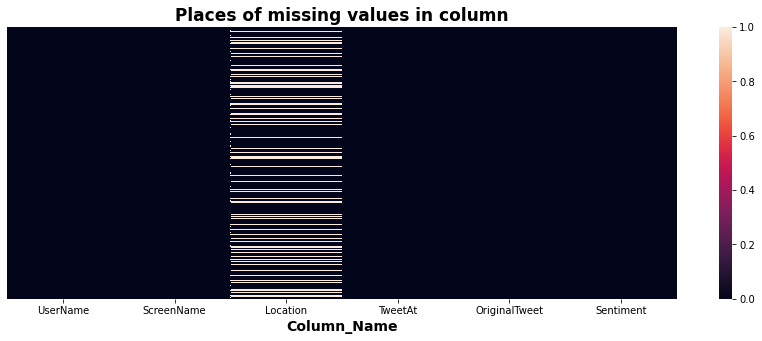

In [14]:
# Plot No- 1
# Plotting heatmap of different columns to check the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(corona_tweet_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [15]:
# Looking the count value of different Location 
corona_tweet_df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [16]:
# Describing the Location 
corona_tweet_df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

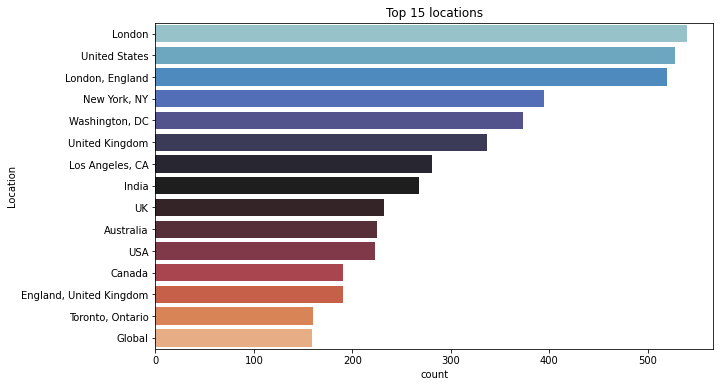

In [17]:
# Plot No- 2
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(10,6))
sns.countplot(y=corona_tweet_df.Location, order = corona_tweet_df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

In [18]:
# Creating dataframe for location
location = pd.DataFrame(corona_tweet_df['Location'].value_counts().sort_values(ascending=False)).reset_index()
location = location.rename(columns={'Location':'count'})
location=location.rename(columns={'index':'Location_name'})

In [19]:
location.head()

,Location_name,count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373


In [20]:
# Importing required library
import plotly.graph_objects as go

In [21]:
# Plot No- 3
# Plotting the interactive pie plot in percentage of Top 15 locations 
data = {
   "values": location['count'][:15],
   "labels": location.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Percentage of Location</b>", legend=dict(x=0.1, y=1.0, orientation="v"))
data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

In [22]:
# Count value of TweetAt (Tweeting date)
corona_tweet_df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [23]:
# Checking unique Tweet dates in TweetAt
corona_tweet_df.TweetAt.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [24]:
# Describing TweetAt
corona_tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

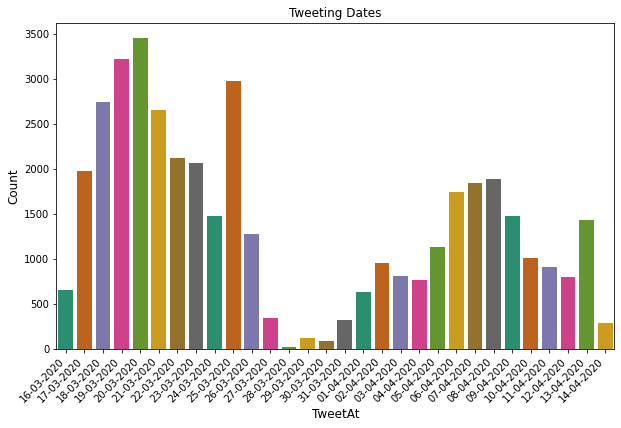

In [25]:
# Plot No- 4
# Distribution of Dates of Tweets
plt.figure(figsize=(10,6))
sns.countplot(x='TweetAt', data=corona_tweet_df, palette ='Dark2')
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("TweetAt",fontsize = 12)
plt.show()

In [26]:
# Checking unique values in Sentiment
corona_tweet_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [27]:
# Describing the sentiments
corona_tweet_df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [28]:
# Checking sentiment count value
corona_tweet_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

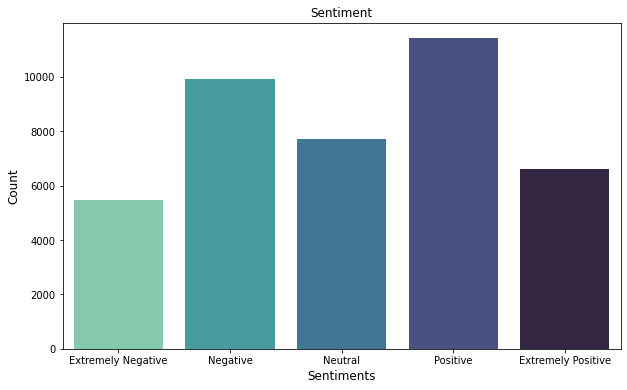

In [29]:
# Plot No- 5
# Plotting the Sentiments count value as countplot 
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=corona_tweet_df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], palette="mako_r")
plt.title("Sentiment")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

In [30]:
# Copying the dataframe
tt_df = corona_tweet_df.copy()
# tt_df['OriginalTweet'] = tt_df['text'] 

In [31]:
# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet
tt_df["text"] = tt_df["text"].astype(str)

In [32]:
# Calculating the text count 
class_df = tt_df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='viridis')

,Sentiment,text
4,Positive,11422
2,Negative,9917
3,Neutral,7713
1,Extremely Positive,6624
0,Extremely Negative,5481


In [33]:
# Plot No - 
# Plotting the number of characters for each tweet sentiment types

tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='yellowgreen')
ax1.set_title('Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Negative Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
ax3.hist(tweet_len,color='red')
ax3.set_title('Neutral Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
ax4.hist(tweet_len,color='yellow')
ax4.set_title('Extremely Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
ax5.hist(tweet_len,color='darkmagenta')
ax5.set_title('Extremely Negative Sentiments')

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(18,5))
fig.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")
# Showing the plot
plt.show()

NameError: ignored

In [ ]:
# Plot No - 
# Finding the average word length in each tweet sentiment type. 

word= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='yellowgreen')
ax1.set_title('Positive')

word= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Negative')

word= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Neutral')

word= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='yellow')
ax4.set_title('Extremely Positive')

word= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='darkmagenta')
ax5.set_title('Extremely Negative')

# Showing the Plot 
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,5))
fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()

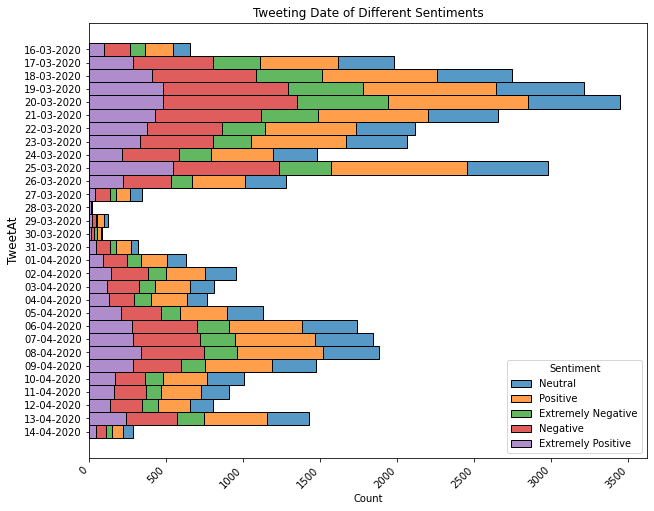

In [34]:
# Plot No- 6
# Plotting Tweet date with different sentiments
plt.figure(figsize=(10,8))
sns.histplot(data=corona_tweet_df, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments")
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

In [35]:
# Creating the corpus from the sentiment & text column and appending them
def create_corpus(target):
    corpus=[]
    
    for x in tt_df[tt_df['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [36]:
# Importing the required library
from collections import defaultdict

In [37]:
# Creating the collection for each sentiment having different punctuation marks for "Positive Sentiment" 
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())

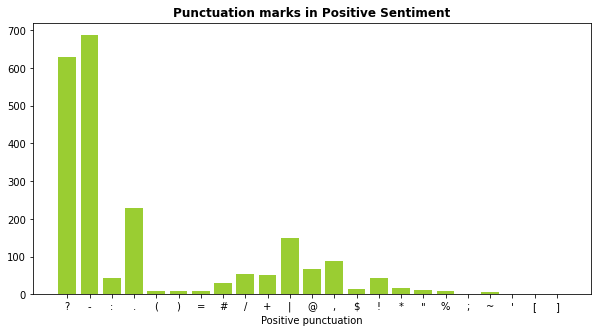

In [38]:
# Plot No - 
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='yellowgreen')
plt.xlabel('Positive punctuation')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

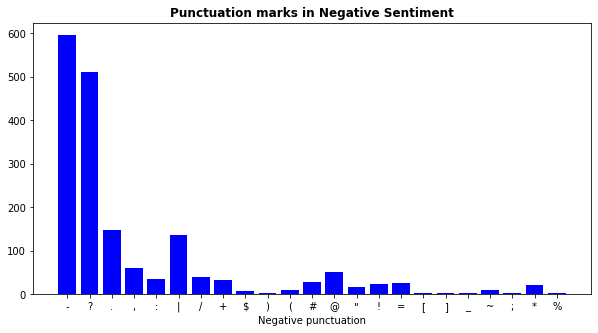

In [39]:
# Creating the collection for each sentiment having different punctuation marks for "Negative Sentiment" 
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())

# Plot No - 
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y, color='blue')
plt.xlabel('Negative punctuation')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

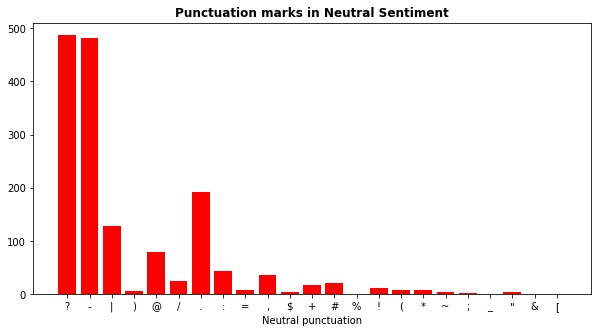

In [40]:
# Creating the collection for each sentiment having different punctuation marks for "Neutral Sentiment" 
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='red')
plt.xlabel('Neutral punctuation')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

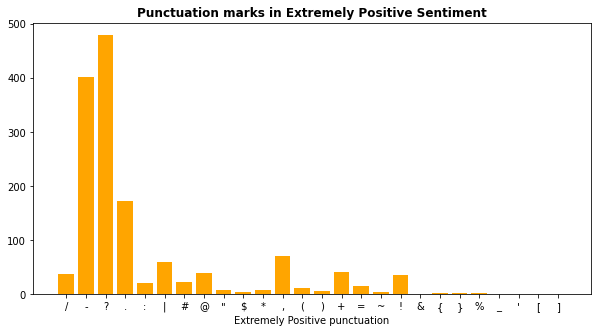

In [41]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Positive Sentiment" 
corpus=create_corpus("Extremely Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

# Plot No - 
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='orange')
plt.xlabel('Extremely Positive punctuation')
plt.title('Punctuation marks in Extremely Positive Sentiment',fontweight ='bold')
plt.show()

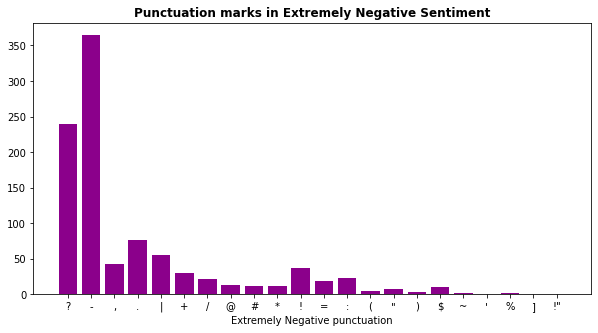

In [42]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Negative Sentiment" 
corpus=create_corpus("Extremely Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
       
x,y=zip(*dic.items())

# Plot No - 
# Plotting the required dataset 
plt.figure(figsize=(10,5))
plt.bar(x,y,color='darkmagenta')
plt.xlabel('Extremely Negative punctuation')
plt.title('Punctuation marks in Extremely Negative Sentiment',fontweight ='bold')
plt.show()

In [43]:
import re

Text(0.5, 1.0, 'Top 10 Mentions Present in Tweets')

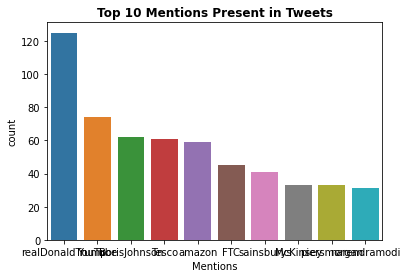

In [44]:
# Finding the different mentions present in tweets with having mentions using @ 
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
tt_df['mentions']=tt_df['text'].apply(lambda x:mentions(x))

temp=tt_df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

# Plot No - 
# Ploting the bar plot 
sns.barplot(x="Mentions",y="count", data = temp)
plt.title("Top 10 Mentions Present in Tweets", fontweight='bold')

In [45]:
# Importing the required library 
import plotly.express as px

# **Text Preprocessing Steps**

In [62]:
twt_df = corona_tweet_df.copy()

In [63]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [64]:
# create new column with removed @user
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [65]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [66]:
# remove special characters, numbers, punctuations
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
twt_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


In [67]:
## Download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]

  # joining the list of words with space separator 
  return " ".join(text)

In [69]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(remove_stopwords)

In [70]:
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...


In [71]:
#Importing libraries
from nltk.stem.snowball import SnowballStemmer

In [72]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [73]:
twt_df['Clean_tweet']= twt_df['Clean_tweet'].apply(stemming)


In [74]:
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic enough food e...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket #covid outbreak paranoid ...


In [75]:
# Creating new dataframe
twt1_df = twt_df[['Clean_tweet', 'Sentiment']]
twt1_df.head(10)

,Clean_tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronavirus australia woolworth give elder dis...,Positive
3,food stock one empti pleas panic enough food e...,Positive
4,readi go supermarket #covid outbreak paranoid ...,Extremely Negative
5,news region first confirm covid case came sull...,Positive
6,cashier groceri store share insight #covid pro...,Positive
7,supermarket today buy toilet paper #rebel #toi...,Neutral
8,due covid retail store classroom atlanta open ...,Positive
9,corona prevent stop buy thing cash use onlin p...,Negative


In [76]:
# Most Common words
from collections import Counter
cnt = Counter()
for text in twt1_df.Clean_tweet.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('#coronavirus', 14155),
 ('#covid', 10673),
 ('covid', 10574),
 ('price', 8911),
 ('store', 8207),
 ('supermarket', 7297),
 ('food', 6996),
 ('groceri', 6496),
 ('peopl', 5594),
 ('amp', 5115)]

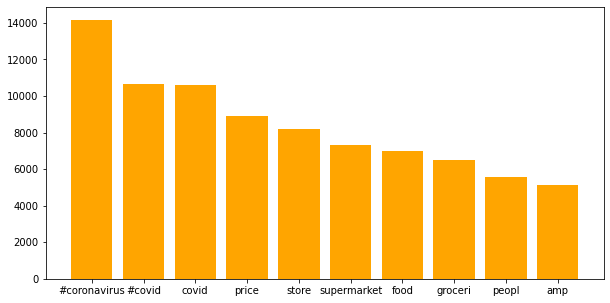

In [77]:
# Plot No -
# Creating top 10 common words used in the tweets
com= sorted(cnt.most_common(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*com)
plt.figure(figsize = (10,5))
plt.bar(x,y, color='orange')
plt.show()

In [80]:
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
twt1_df = twt1_df.replace(replace_values)

In [81]:
sentiment_count2 = twt1_df['Sentiment'].value_counts().reset_index()
sentiment_count2.columns=['Sentiment','count']
sentiment_count2

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


Text(0, 0.5, 'Count')

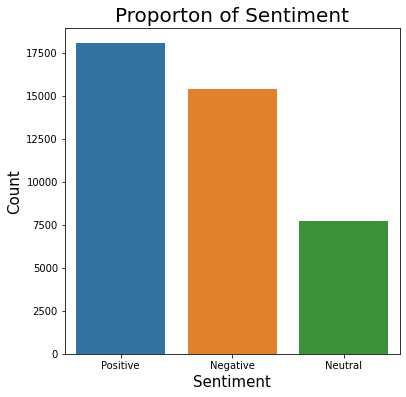

In [82]:
plt.figure(figsize=(6,6))
ax2 = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count2)
ax2.set_title('Proporton of Sentiment', fontsize=20)
ax2.set_xlabel("Sentiment",fontsize=15)
ax2.set_ylabel("Count",fontsize=15)

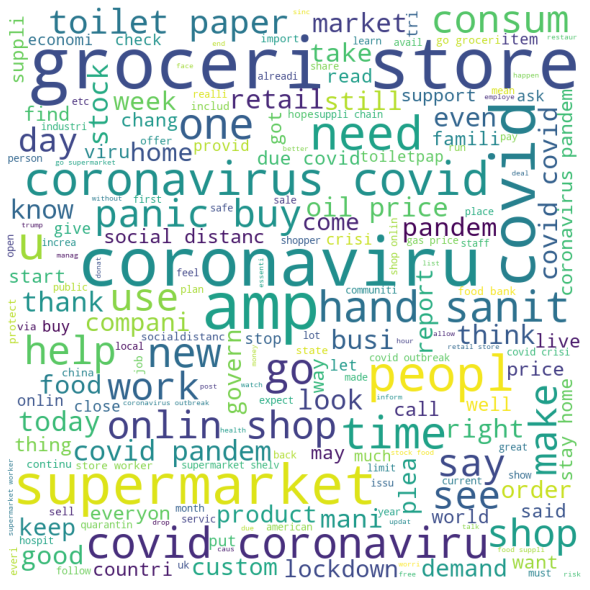

In [84]:
# Python program to generate WordCloud
  ## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in twt1_df.Clean_tweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [86]:
## defining Independent variable
X = twt1_df.Clean_tweet

## defining dependent variable
y = twt1_df.Sentiment

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=6)

In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((32925,), (32925,), (8232,), (8232,))

In [89]:
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [90]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [91]:
## model prediction
y_pred = model.predict(X_test)

In [92]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',pac)])
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', PassiveAggressiveClassifier())])

In [93]:
y_pred_pac=model2.predict(X_test)


In [94]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model3 = Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
model3.fit(X_train,y_train)
y_pred_sgd = model3.predict(X_test)

In [95]:
from sklearn.svm import SVC

svc = SVC()

model4 = Pipeline([('vectorizer',tvec),('classifier',svc)])
model4.fit(X_train,y_train)
y_pred_svc = model3.predict(X_test)

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [97]:
model5 = Pipeline([('vectorizer',tvec),('classifier',rf)])

In [98]:
model5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [99]:
y_pred_rf = model5.predict(X_test)

In [100]:
## Performance Metrics and Accuracy

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [102]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

Accuracy : 0.7961613216715258
Precision : 0.8024065048647047
Recall : 0.7961613216715258


In [103]:
print('Accuracy :' ,accuracy_score(y_pred_pac,y_test))
print('Precision :', precision_score(y_pred_pac,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_pac,y_test, average='weighted'))

Accuracy : 0.7428328474246841
Precision : 0.7413093792803448
Recall : 0.7428328474246841


In [104]:
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))

Accuracy : 0.7838921282798834
Precision : 0.8079755083443279
Recall : 0.7838921282798834


In [105]:
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))

Accuracy : 0.7838921282798834
Precision : 0.8079755083443279
Recall : 0.7838921282798834


In [106]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))

Accuracy : 0.74477648202138
Precision : 0.7515878142133829
Recall : 0.74477648202138


In [ ]:
# models = pd.DataFrame({
#     'Model': ['Stochastic Gradient Decent','Logistic Regression','Support Vector Machines',
#               'Random Forest', 'Naive Bayes','XGBoost'],
#     'Test accuracy': [sgd_accuracy, logreg_accuracy,svc_accuracy,
#               rf_accuracy, NB_accuracy,xgb_accuracy]})

# models.sort_values(by='Test accuracy', ascending=False)

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve


In [111]:
# from sklearn.naive_bayes import MultinomialNB

# naiveByes_clf = MultinomialNB()

# naiveByes_clf.fit(X_train, y_train)

# NB_prediction = naiveByes_clf.predict(X_test)
# NB_accuracy = accuracy_score(y_test,NB_prediction)
# print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
# print("Validation accuracy Score : ",NB_accuracy )
# print(classification_report(NB_prediction,y_test))

ValueError: ignored

In [ ]:
# from prettytable import PrettyTable 
  
# # Specify the Column Names while initializing the Table 
# myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 

In [107]:
Tweet = ['hospitals are good', 'boy is sad',
         'he fell sick', 'he is not satisfied',
        'he is angry with his behaviour', 'taste of food bad', 'snacks are good']
result = model.predict(Tweet)

print(result)

['Positive' 'Negative' 'Negative' 'Neutral' 'Neutral' 'Negative'
 'Positive']
